## Artificial Intelligence
## L2 International, Univ. Bordeaux

### Lab #5, Supervised Learning (4)
In this lab, we will see how to build a neural network with the Keras framework in Python. As usual, we give an incomplete python program. Some instructions will be used as they are and you do not need to change them. We will comment some of them but we do not need to understand them all. We will use the dataset MNIST, one of the most used datasets in machine learning research. This dataset consists of 70000 images of handwritten digits (of size 28x28).

### Artificial neural networks
Recall that an artificial neural network (ANN for short) consists of a set of layers disposed linearly, and each layer is a set of (artificial) neurons. The model is simplified so that signals can only circulate from the bottom layer to the top layer. Each neuron in the $k$-th layer of the neural network is connected to all the neurons in the $(k−1)$-th layer, and the neurons in a given layer are all independent from each other.

A neural network consists of the following components

<ul>
    <li>An input layer, $x$</li>
    <li>An arbitrary amount of hidden layers</li>
    <li>An output layer, $y$</li>
    <li>A set of weights and biases between each layer, $w$ and $b$</li>
    <li>A choice of activation function for each hidden layer, $σ$.</li>
</ul>

As usual, we need to import necessary python modules:

In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [9]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', y_train.shape)

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)


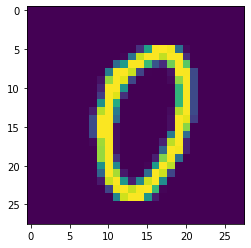

0


In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1000])
plt.show()

print(y_train[1000])

In [13]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
print(X_train.shape)
# 에러나기 전부분까지는 실행된 채로 변수에 저장됨

(60000, 784)


In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam

In [18]:
import keras
import keras.utils
from keras import utils as np_utils

In [19]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [20]:
num_classes = y_train.shape[1]
def neural_network():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [21]:
model = neural_network()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 5s 78us/step - loss: 0.2291 - accuracy: 0.9346 - val_loss: 0.1171 - val_accuracy: 0.9659


In [25]:
scores = model.evaluate(X_test, y_test)
print('Neural network accuracy: %.2f%%' % (scores[1]*100))

10000/10000 [==============================] - 0s 42us/step
Neural network accuracy: 96.59%
